# Customer Churn em Operadoras de Telecom

## 1. Definição do Problema

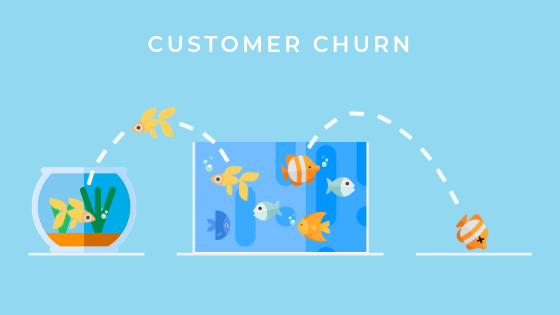

**Customer Churn** (ou Rotatividade de Clientes, em uma tradução livre)
refere-se a uma decisão tomada pelo cliente sobre o término do relacionamento
comercial. Refere-se também à perda de clientes. A fidelidade do cliente e a
rotatividade de clientes sempre somam 100%. Se uma empresa tem uma taxa de
fidelidade de 60%, então a taxa de perda de clientes é de 40%. De acordo com a
regra de lucratividade do cliente 80/20, 20% dos clientes estão gerando 80% da
receita. Portanto, é muito importante prever os usuários que provavelmente
abandonarão o relacionamento comercial e os fatores que afetam as decisões do
cliente.

**Objetivo:** Realizar a previsão do customer churn em uma operadora de telecom. Criar um modelo de aprendizagem de máquina (regressão logística) que possa prever se um cliente vai cancelar seu plano (1 ou 0/Sim ou Não) e a probabilidade de uma opção ou outra.

## 2. Dados

### 2.1. Importando as bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd

# Computação científica
import numpy as np

# Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Filtro de Warnings
import warnings
warnings.filterwarnings('ignore')

# Normalização e padronização
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Balanceamento
from imblearn.over_sampling import SMOTE

# Multicolinearidade
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

### 2.2. Carregando os Dados

Os dados são fornecidos pela plataforma de ensino Data Science Academy, sendo que, estão divididos em datasets de treino e teste. Dessa forma, todas as manipulações, transformações, entre outros aspectos relacionados ao tratamento dos dados, precisam ser realizados nos dados de treino, como também nos dados de teste.

In [2]:
# Dados de treino
dataTrain = pd.read_csv('C:/Users/otavio/Mundo/Big-Data-Analytics-Python-Spark/Projeto4-Prevendo-Customer-Churn/projeto4_telecom_treino.csv', index_col = 0)

In [3]:
# Primeiras linhas dados de treino
dataTrain.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
# Dados de teste
dataTest = pd.read_csv('C:/Users/otavio/Mundo/Big-Data-Analytics-Python-Spark/Projeto4-Prevendo-Customer-Churn/projeto4_telecom_teste.csv', index_col = 0)

In [5]:
# Primeiras linhas dados de teste
dataTest.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
4,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
5,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


### 2.3. Dicionário dos Dados

In [6]:
# Nome das colunas/variávies
dataTrain.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [7]:
# Descrição de cada coluna
descricao = ['Estado', 'Número de dias na qual a conta está ativa', 'Código da área ', 'Plano internacional', \
             'Plano de voz', 'Número de menssagens de voz realizadas', \
             'Total de minutos falados durante o dia', 'Total de chamadas realizadas durante o dia', \
             'Total pago por chamadas realizadas durante o dia', 'Total de minutos falados no início da noite', \
             'Total de chamadas realizadas no início da noite', 'Total pago por ligações realizadas no início da noite', \
             'Total de minutos falados no fim da noite', 'Total de chamadas realizadas no fim da noite', \
             'Total pago por ligações realizadas no fim da noite', 'Total de minutos falados em chamadas internacionais', \
             'Total de chamadas internacionais realizadas', 'Total cobrado por chamadas internacionais', \
             'Número de chamadas feitas para o atendimento ao cliente', 'Se o cliente cancelou ou não o serviço (variável target)']

In [8]:
# Dicionário dos dados
dict_dados = {'Variaveis' : [dataTrain.columns[i] for i in range(20)],
              'Descricao' : descricao,
              'Tipo de dados' : [dataTrain.dtypes[i] for i in range(20)]} 

# Dataframe do dicionário de dados
pd.set_option('max_colwidth', 100) # ajustando o tamanho das colunas
df_dict_dados = pd.DataFrame(dict_dados)
df_dict_dados

,Variaveis,Descricao,Tipo de dados
0,state,Estado,object
1,account_length,Número de dias na qual a conta está ativa,int64
2,area_code,Código da área,object
3,international_plan,Plano internacional,object
4,voice_mail_plan,Plano de voz,object
5,number_vmail_messages,Número de menssagens de voz realizadas,int64
6,total_day_minutes,Total de minutos falados durante o dia,float64
7,total_day_calls,Total de chamadas realizadas durante o dia,int64
8,total_day_charge,Total pago por chamadas realizadas durante o dia,float64
9,total_eve_minutes,Total de minutos falados no início da noite,float64


In [9]:
# Salvando o dicionário de dados
df_dict_dados.to_csv('dicionario_dados.csv', sep = ',')

In [10]:
# Retornando o tamanho normal das colunas
pd.reset_option('max_colwidth')

## 3. Data Munging

In [11]:
# Shape dos dados de treino
dataTrain.shape

(3333, 20)

In [12]:
# Visão geral dos dados de treino
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

Os dados de treino possuem 20 colunas e 3333 linhas, ou seja, cada uma das colunas possui 3333 registros. Outro ponto importante é o fato do dataset não conter valores nulos. Além disso, será realizada algumas transformações nas variáveis, como também a formação de variáveis novas.

In [13]:
dataTrain.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [14]:
# Função na qual realiza a transformação e criação de features
def transformFeatures(dataset):
    
    # Transforma as features que retornam yes/no em 1/0 e atribui a uma nova feature
    dictYesNo = {'yes' : 1, 'no' : 0}
    
    dataset['international_plan_num'] = dataset.international_plan.map(dictYesNo)
    dataset['voice_mail_plan_num'] = dataset.voice_mail_plan.map(dictYesNo)
    dataset['churn_num'] = dataset.churn.map(dictYesNo)
    
    # Remove as strings dos códigos de Area, preservando somente o código em um novo campo
    dictAreaCode = {"area_code_415": 0, "area_code_408": 1, "area_code_510": 2}

    dataset['area_code_num'] = dataset['area_code'].map(dictAreaCode)
    
    # Transforma o valor dos status em Numeros em um novo campo
    dictState = {'KS': 1000, 'OH': 1001, 'NJ': 1002, 'OK': 1003, 'AL': 1004, 'MA': 1005, 
                    'MO': 1006, 'LA': 1007, 'WV': 1008, 'IN': 1009, 'RI': 1010, 
                    'IA': 1011, 'MT': 1012, 'NY': 1013, 'ID': 1014, 'VT': 1015, 
                    'VA': 1016, 'TX': 1017, 'FL': 1018, 'CO': 1019, 'AZ': 1020, 
                    'SC': 1021, 'NE': 1022, 'WY': 1023, 'HI': 1024, 'IL': 1025, 
                    'NH': 1026, 'GA': 1027, 'AK': 1028, 'MD': 1029, 'AR': 1030, 
                    'WI': 1031, 'OR': 1032, 'MI': 1033, 'DE': 1034, 'UT': 1035, 
                    'CA': 1036, 'MN': 1037, 'SD': 1038, 'NC': 1039, 'WA': 1040, 
                    'NM': 1041, 'NV': 1042, 'DC': 1043, 'KY': 1044, 'ME': 1045, 
                    'MS': 1046, 'TN': 1047, 'PA': 1048, 'CT': 1049, 'ND': 1050}
    
    dataset['state_num'] = dataset['state'].map(dictState)
    
    # Transforma algumas features em variáveis categóricas
    dataset['international_plan'] = dataset['international_plan'].astype('category')
    dataset['voice_mail_plan'] = dataset['voice_mail_plan'].astype('category')    
    dataset['area_code'] = dataset['area_code'].astype('category')
    dataset['state'] = dataset['state'].astype('category')
    
    # Criando novas features: total de minutos, total de ligações e total pago pelo cliente
    dataset['total_minutes'] = dataset.total_day_minutes + dataset.total_eve_minutes + dataset.total_night_minutes + dataset.total_intl_minutes
    dataset['total_calls'] = dataset.total_day_calls + dataset.total_eve_calls + dataset.total_night_calls + dataset.total_intl_calls
    dataset['total_charge'] = dataset.total_day_charge + dataset.total_eve_charge + dataset.total_night_charge + dataset.total_intl_charge
    
    # Período na qual o cliente mais utliza o serviço
    shift = []
    
    for i in dataset.values:
        if i[6] > i[9] and i[6] > i[12]:
            shift.append('day')
        elif i[9] > i[6] and i[9] > i[12]:
            shift.append('evening')
        elif i[12] > i[6] and i[12] > i[9]:
            shift.append('night')
        else:
            shift.append('no preference')
            
    dataset['shift'] = shift
    dataset['shift'] = dataset['shift'].astype('category')
    
    return dataset

In [15]:
# Aplicação da função transformFeatures
dataTrain = transformFeatures(dataTrain)

In [16]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 29 columns):
state                            3333 non-null category
account_length                   3333 non-null int64
area_code                        3333 non-null category
international_plan               3333 non-null category
voice_mail_plan                  3333 non-null category
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls   

In [17]:
# Novo dataset construído após as transformações aplicadas
dataTrain.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,churn,international_plan_num,voice_mail_plan_num,churn_num,area_code_num,state_num,total_minutes,total_calls,total_charge,shift
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,...,no,0,1,0,0,1000,717.2,303,75.56,day
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,no,0,1,0,0,1001,625.2,332,59.24,night
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,no,0,0,0,0,1002,539.4,333,62.29,day
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,no,1,0,0,1,1001,564.8,255,66.80,day
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,no,1,0,0,0,1003,512.0,359,52.09,night


## 4. Análise Exploratória dos Dados

In [18]:
# Algumas estatísticas descritivas dos dados
dataTrain.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,number_customer_service_calls,international_plan_num,voice_mail_plan_num,churn_num,area_code_num,state_num,total_minutes,total_calls,total_charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,...,2.764581,1.562856,0.096910,0.276628,0.144914,0.755476,1024.269127,591.864776,305.137114,59.449754
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,...,0.753773,1.315491,0.295879,0.447398,0.352067,0.830054,14.736558,89.954251,34.448164,10.502261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,284.300000,191.000000,22.930000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,1012.000000,531.500000,282.000000,52.380000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,2.780000,1.000000,0.000000,0.000000,0.000000,1.000000,1024.000000,593.600000,305.000000,59.470000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,3.270000,2.000000,0.000000,1.000000,0.000000,2.000000,1037.000000,652.400000,328.000000,66.480000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,...,5.400000,9.000000,1.000000,1.000000,1.000000,2.000000,1050.000000,885.000000,416.000000,96.150000


Através da breve análise realizada acima, pode-se perceber que será necessário aplicar uma normalização aos dados, uma vez que encontram-se em diferentes escalas. Além disso, será utilizado o algoritmo de regressão logística, na qual obtém melhores resultados quando os dados estão normalizados.

In [19]:
# Distribuição da variável churn, a variável target, aquela a ser prevista
churn_dist = dataTrain.churn.value_counts()
churn_dist

no     2850
yes     483
Name: churn, dtype: int64

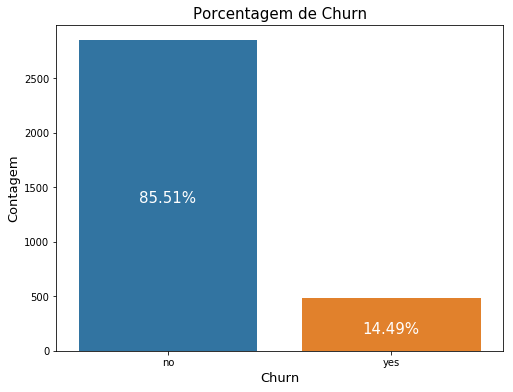

In [20]:
# Percentual de clientes que cancelaram e que não cancelaram o serviço
churn_no = str(round((churn_dist[0] * 100 / (churn_dist[0] + churn_dist[1])), 2)) + '%'
churn_yes = str(round((churn_dist[1] * 100 / (churn_dist[0] + churn_dist[1])), 2)) + '%'

# Construção do gráfico
fig, ax = plt.subplots(figsize = (8, 6))

sns.countplot(x = 'churn', data = dataTrain)
ax.set_title('Porcentagem de Churn', fontsize = 15)
plt.xlabel('Churn', fontsize = 13)
plt.ylabel('Contagem', fontsize = 13)
ax.text(0, 1400, churn_no,fontsize = 15,color = 'white', ha = 'center', va = 'center')
ax.text(1, 200, churn_yes, fontsize = 15,color = 'white', ha = 'center', va = 'center')

# Mostrar gráfico
plt.show()

O dataset encontra-se desbalanceado, ou seja, possui muito mais registros de não cancelamento do que o oposto. Este fato pode causar um viés no modelo de machine learning. Portanto, será preciso balancear a variável churn para que, dessa forma, seja possível obter um resultado mais confiável.

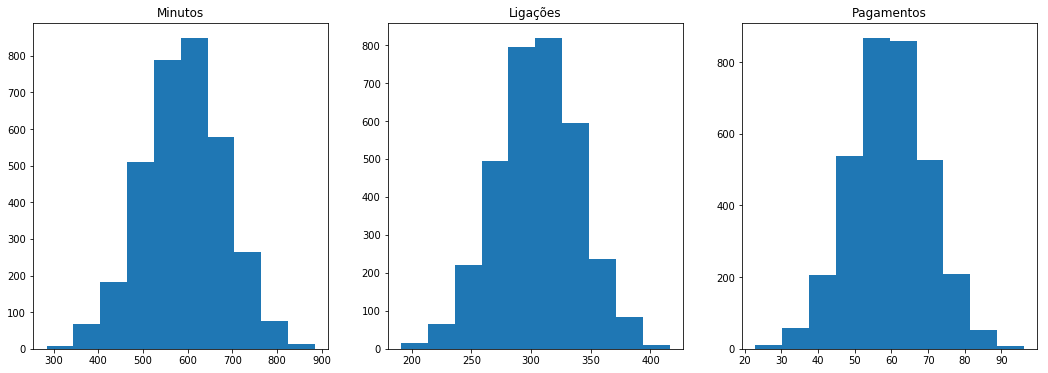

In [21]:
# Histogramas: minutos, ligações e pagamentos

# Área de plotagem
fig, ax = plt.subplots(1, 3, figsize = (18, 6))

# Gráfico minutos
ax[0].hist(dataTrain.total_minutes, bins = 10)
ax[0].set_title('Minutos')

# Gráfico ligações
ax[1].hist(dataTrain.total_calls, bins = 10)
ax[1].set_title('Ligações')

# Gráfico pagamentos
ax[2].hist(dataTrain.total_charge, bins = 10)
ax[2].set_title('Pagamentos')

plt.show()

A grande maioria dos clientes desta empresa realizam entre 250 e 350 ligações, que possuem duração entre 450 e 700 minutos, totalizando pagamentos entre 50 e 70 dólares. Além disso, é importante salientar que estes dados encontram-se normalizados, isto é, respeitam uma distribuição normal. 

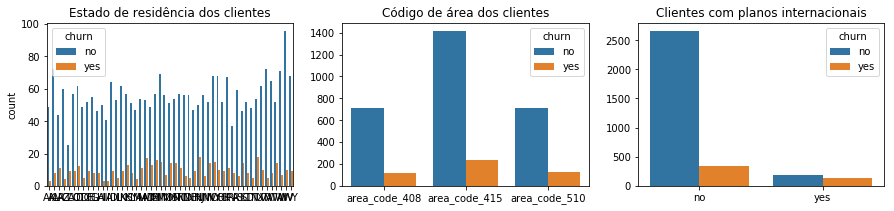

In [22]:
# Relacionamento entre a variável churn e algumas outras
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

# Gráfico 1: state x churn
sns.countplot(x = 'state', hue = 'churn', data = dataTrain, ax = ax[0])
ax[0].set_title('Estado de residência dos clientes')
ax[0].set_xlabel('')

# Gráfico 2: area_code x churn
sns.countplot(x = 'area_code', hue = 'churn', data = dataTrain, ax = ax[1])
ax[1].set_title('Código de área dos clientes')
ax[1].set_xlabel('')
ax[1].set_ylabel('')


# Gráfico 3: international_plan x churn
sns.countplot(x = 'international_plan', hue = 'churn', data = dataTrain, ax = ax[2])
ax[2].set_title('Clientes com planos internacionais')
ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.show()

Obervamos que o estado na qual o cliente se encontra pouco interfere na sua decisão de cancelar ou não o serviço. O mesmo é observado ao código de área dos clientes, embora, proporcionalmente os clientes dos códigos de área 408 e 510 cancelem mais o serviço quando comparamos com os clientes do cogido de área 415.

Em relação aos clientes com planos internacionais, nota-se um alto cancelamento do serviço daqueles clientes que adquirem o plano, enquanto os que não adquirem possuem uma taxa de cancelamento baixa. Planos internacionais são mais caros e necessitam de um bom funcionamento. Outro ponto importante refere-se ao fato desses clientes possivelmente estarem dentro daqueles 20% de clientes que representam 80% dos lucros da empresa.

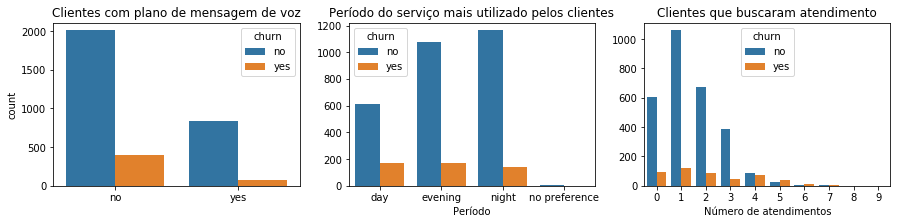

In [23]:
# Relacionamento entre a variável churn e algumas outras
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

# Gráfico 1: voice_mail_plan x churn
sns.countplot(x = 'voice_mail_plan', hue = 'churn', data = dataTrain, ax = ax[0])
ax[0].set_title('Clientes com plano de mensagem de voz')
ax[0].set_xlabel('')

# Gráfico 2: shift x churn
sns.countplot(x = 'shift', hue = 'churn', data = dataTrain, ax = ax[1])
ax[1].set_title('Período do serviço mais utilizado pelos clientes')
ax[1].set_xlabel('Período')
ax[1].set_ylabel('')


# Gráfico 3: number_customer_service_calls x churn
sns.countplot(x = 'number_customer_service_calls', hue = 'churn', data = dataTrain, ax = ax[2])
ax[2].set_title('Clientes que buscaram atendimento')
ax[2].set_xlabel('Número de atendimentos')
ax[2].set_ylabel('')

plt.show()

O fato de clientes possuírem ou não plano com mensagem de voz parece não influenciar no cancelamento do serviço. Assim como também, o período na qual o serviço é utilizado não parece ter influência nessa decisão.

Por outro lado, em relação aos clientes que buscam atendimento, os clientes na qual pouco procuram o atendimento não costumam realizar o cancelamento. Para os usuários do serviço que procuram atendimento 4 vezes ou mais, esse parece ser um fator determinante na hora de cancelar o serviço, devido ao alto churn.

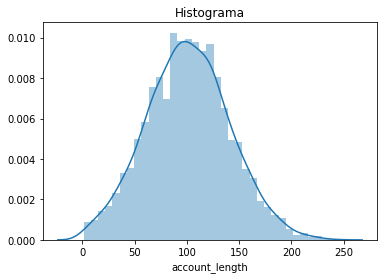

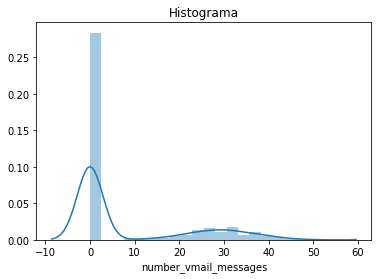

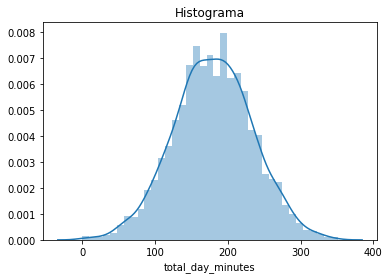

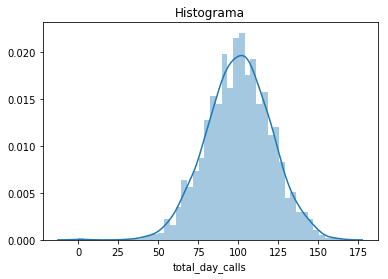

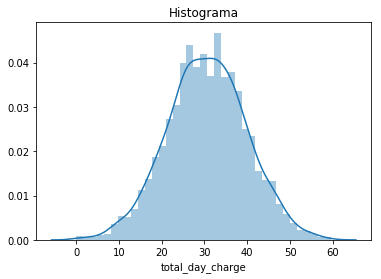

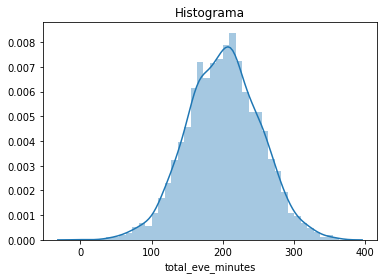

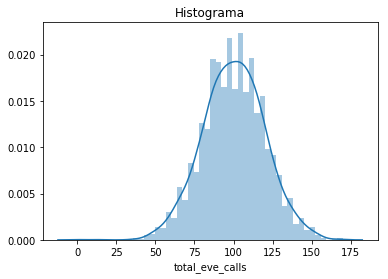

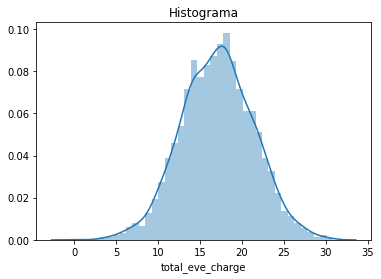

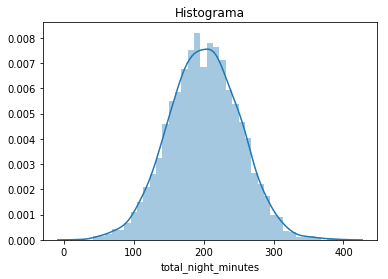

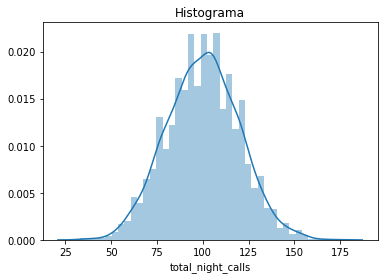

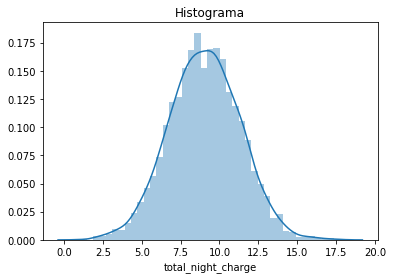

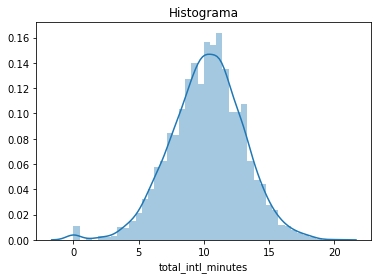

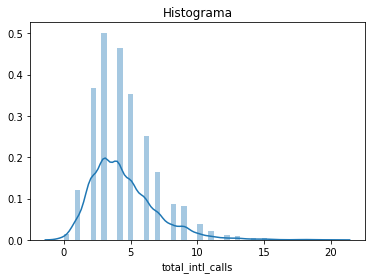

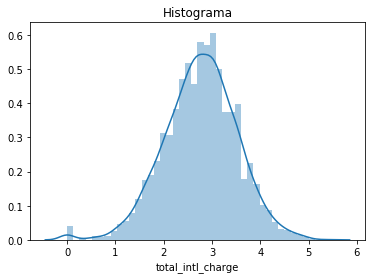

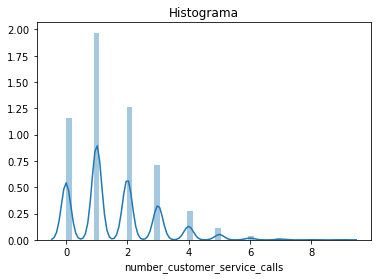

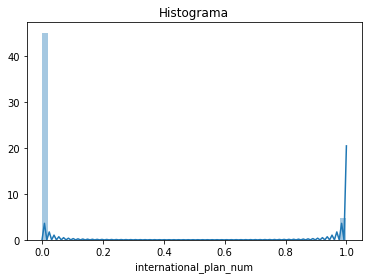

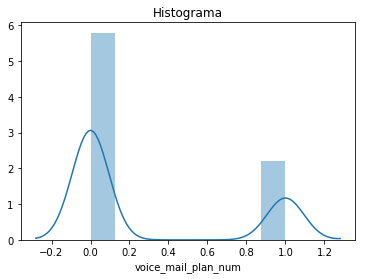

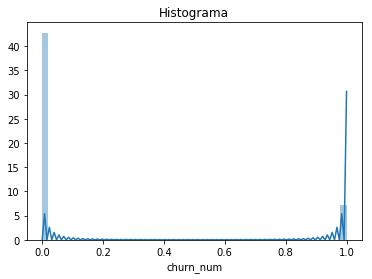

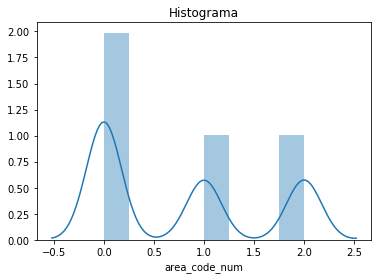

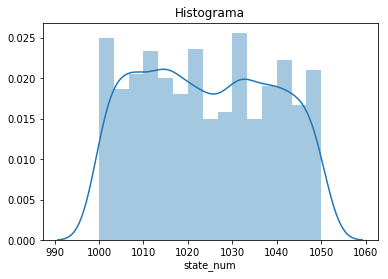

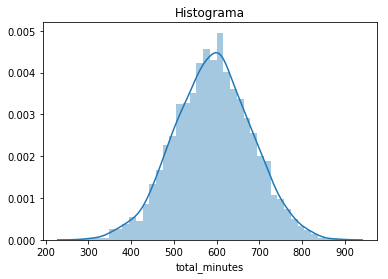

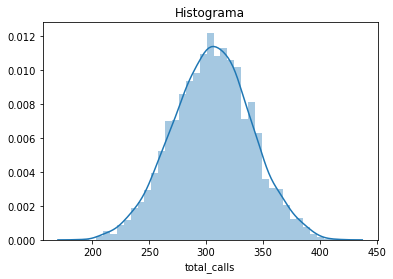

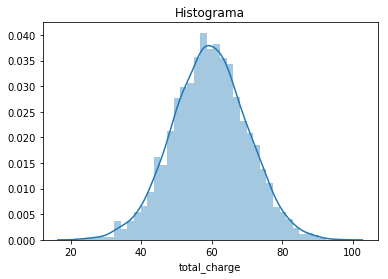

In [24]:
# Histogramas: As features apresentam distribuição normal?
features = dataTrain.select_dtypes(exclude = ['category', 'object']).columns

for item in features:
    sns.distplot(dataTrain[item])
    plt.title('Histograma')
    plt.show()

Através dos histogramas pode-se perceber que a grande maioria das features estão de acordo com uma distribuição gaussiana, ou seja, estão normalizadas. A excessão são as features categóricas, aonde já era esperado que não estivessem de acordo com uma distribuição normal. Porém, as features number_vmail_messages, total_int_calls e number_customer_service_calls não encontram-se normalizadas, dessa forma será preciso realizar a padronização dos dados, de forma que todas as features representem uma distribuição gaussiana.

## 5. Transformações dos dados

In [25]:
# Remoção das variávies categóricas, uma vez que já foram criadas outras variávies numéricas em seus lugares.
# Serão removidas também variávies criadas apenas para a análise exploratória.
data = dataTrain.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn', 'total_minutes', 
                       'total_calls', 'total_charge', 'shift'], axis = 1)

In [26]:
# Variável target
target = data['churn_num']

In [27]:
# Removendo a variável target do conjunto de dados
data = data.drop(['churn_num'], axis = 1)

### 5.1. Normalização

Processo que confere aos dados estarem em uma mesma escala, ou seja, em um range que varia de 0 a 1.

In [28]:
# Transformando o dataframe em um array numpy
data_np = data.values

# Normalização
scaler = MinMaxScaler(feature_range = (0, 1))
data_normalized = scaler.fit_transform(data_np)

### 5.2. Padronização

Processo que transforma os dados de acordo com uma distribuição normal. Possui melhor desempenho com os dados normalizados.

In [29]:
scaler = StandardScaler().fit(data_normalized)
data_stardard = scaler.transform(data_normalized)

### 5.3. Balanceamento

O método a ser utilizado para resolver o problema do balanceamento dos dados é o SMOTE. Esse método consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. Ele calcula quais são os vizinhos mais próximos e as características desses vizinhos para criar novos dados.

In [30]:
balancer = SMOTE()
data_stardard, target_balancer = balancer.fit_resample(data_stardard, target)

### 5.4. Correlação e Colinearidade

Caso as variáveis forem muito correlacionadas, as inferências baseadas no modelo de regressão podem ser errôneas ou pouco confiáveis. Por isso, é importante verificar a colinearidade entre as variávies.

In [31]:
# Matriz de correlação
corr = pd.DataFrame(data_stardard, columns = data.columns).corr(method = 'pearson')

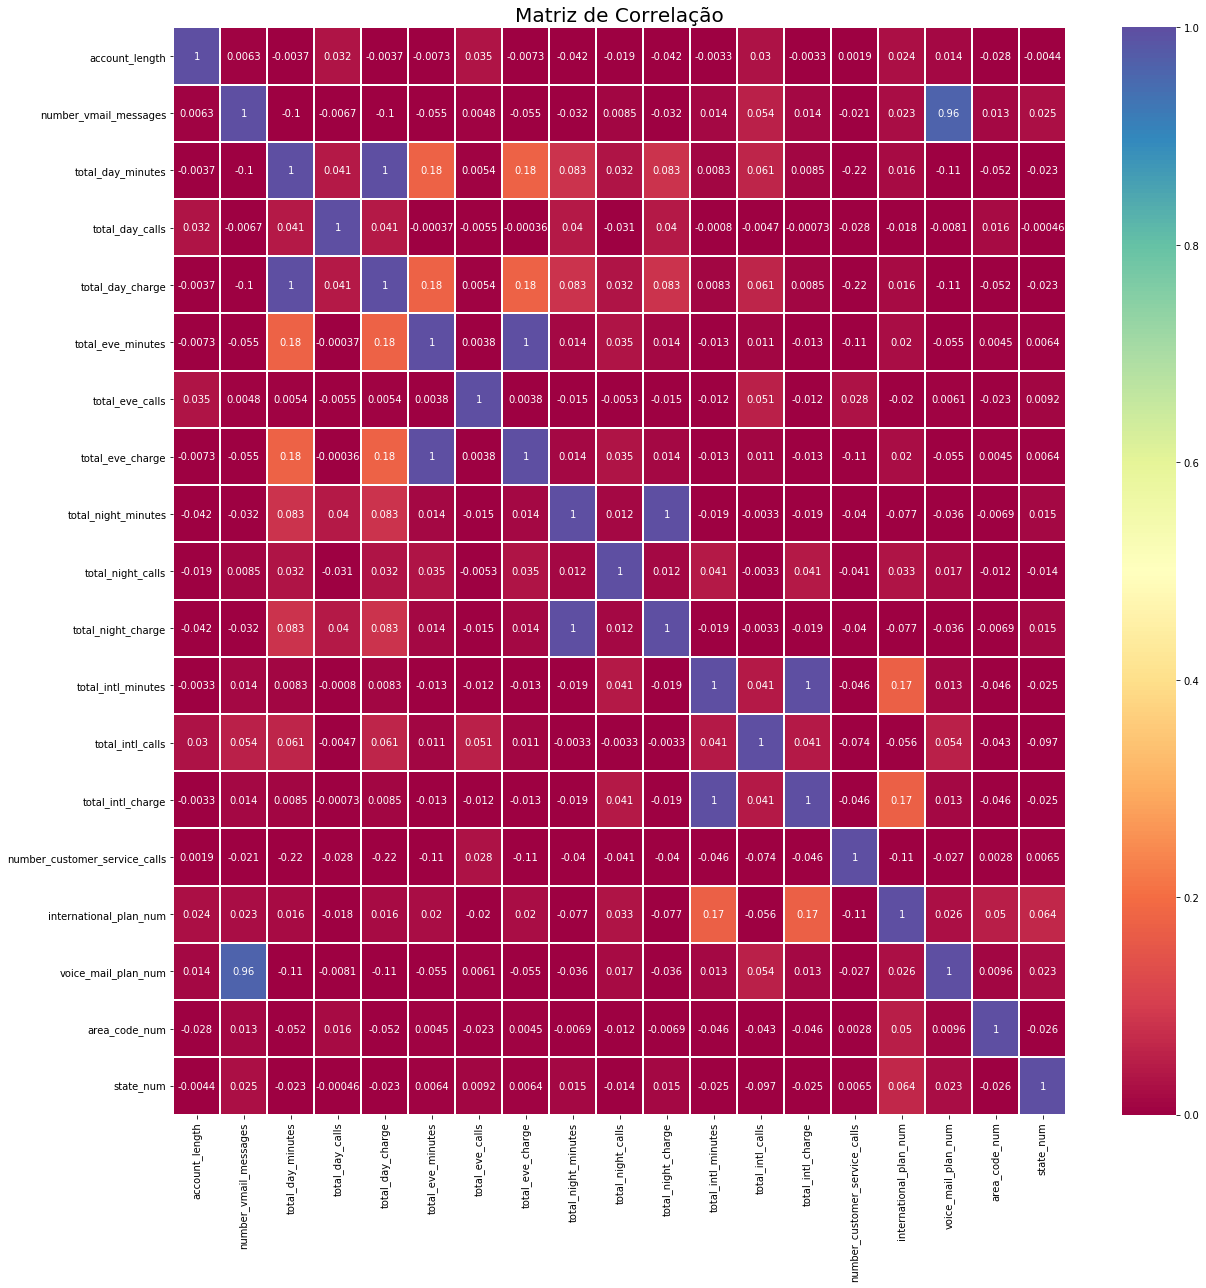

In [32]:
# Gráfico matriz de correlação
fig, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(corr, vmin = 0, vmax = 1, linewidths = 1, annot = True, cmap = 'Spectral')
ax.set_title('Matriz de Correlação', fontsize = 20)

plt.show()

Podemos diagnosticar Multicolinearidade por meio do VIF (Variance Inflation Factor). Os VIFs medem o quanto a variância de um coeficiente de regressão estimado aumenta se seus preditores estão correlacionados. Se todos os VIFs forem 1, não há multicolinearidade, mas se alguns VIFs forem maiores do que 1, os preditores estão correlacionados. Quando um VIF é 5 > 10, o coeficiente de regressão para esse termo não é estimado de maneira apropriada.

In [33]:
# Datafram com os dados prontos
vif = pd.DataFrame(data_stardard, columns = data.columns)

# Coeficiente
x = add_constant(vif)

# VIF
vif_series = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index = x.columns)
vif = pd.DataFrame(vif_series, columns = ['VIF Factor'])
vif

,VIF Factor
const,1.169904e+00
account_length,1.007958e+00
number_vmail_messages,1.444719e+01
total_day_minutes,1.486189e+07
total_day_calls,1.007281e+00
total_day_charge,1.486190e+07
total_eve_minutes,2.416838e+06
total_eve_calls,1.006157e+00
total_eve_charge,2.416816e+06
total_night_minutes,6.327493e+05


De acordo com o VIF, as variáveis total_night_minutes, total_night_charge, total_intl_minutes e total_intl_charge ultrapassam o valor máximo de 5, dessa forma, serão excluídas do dataset.

In [34]:
# Remoção das variáveis colineares
data_stardard = pd.DataFrame(data_stardard).drop(columns = [8, 10, 11, 13]).values

## 6. Machine Learning

Com as features devidamente tratadas e escolhidas é possível dar início ao processo de Machine Learning. A proposta inicial era utilizar o modelo de Regressão Logística para fazer as previsões, entretanto, vou utilizar também outros modelos para fazer comparações e, dessa forma, escolher aquele mais adequado.

In [35]:
# Divisão do dataset em dados de treino e dados de teste
test_size = 0.3
x_treino, x_teste, y_treino, y_teste = train_test_split(data_stardard, target_balancer, test_size = test_size)

### 6.1. Regressão Logística

In [36]:
# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes1 = modelo.predict(x_teste)

In [37]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes1))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes1) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes1) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       862
           1       0.77      0.76      0.77       848

    accuracy                           0.77      1710
   macro avg       0.77      0.77      0.77      1710
weighted avg       0.77      0.77      0.77      1710

Acurácia: 77.076
AUC: 77.069


In [38]:
# Salvando o modelo XGBoost
arquivo1 = 'modelo/model_reg_log.sav'
pickle.dump(modelo, open(arquivo1, 'wb'))

O modelo apresentou um bom desempenho, uma vez que sua acurácia encontra-se acima de 70%, faixa considerada boa para o problema a ser resolvido. A métrica AUC, área do grpafico que fica sob a curva, ou seja, a precisão do modelo, também obteve porcentagem satisfatória.

### 6.1.1. Regressão Logística com Cross  Validation

In [39]:
# Definindo os valores para o número de folds
num_folds = 10

# Separando os dados em folds
kfold = KFold(num_folds, True)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, data_stardard, target_balancer, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.702


Ao utilizar cross validation para realizar a partição dos dados de treino e de teste, não foi notada nenhuma melhora significativa do modelo, pelo contrário, verificou-se uma leve queda na sua performance.

### 6.2. Linear Discriminant Analysis

In [40]:
# Criação do modelo
modelo = LinearDiscriminantAnalysis()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes2 = modelo.predict(x_teste)

In [41]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes2))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes2) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes2) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       862
           1       0.77      0.76      0.77       848

    accuracy                           0.77      1710
   macro avg       0.77      0.77      0.77      1710
weighted avg       0.77      0.77      0.77      1710

Acurácia: 76.901
AUC: 76.894


Foi observada uma leve melhora nesse modelo, porém nada significativo.

In [42]:
# Salvando o modelo XGBoost
arquivo2 = 'modelo/model_LDA.sav'
pickle.dump(modelo, open(arquivo2, 'wb'))

### 6.3. KNN - K-Nearest Neighbors

In [43]:
# Criação do modelo
modelo = KNeighborsClassifier()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes3 = modelo.predict(x_teste)

In [44]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes3))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes3) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes3) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       862
           1       0.82      0.98      0.89       848

    accuracy                           0.88      1710
   macro avg       0.90      0.88      0.88      1710
weighted avg       0.90      0.88      0.88      1710

Acurácia: 88.012
AUC: 88.092


Com o algoritmo KNN foi observada uma grande melhora na performance do modelo, porém o modelo apredeu de maneira enviesada (recall).

In [45]:
# Salvando o modelo XGBoost
arquivo3 = 'modelo/model_KNN.sav'
pickle.dump(modelo, open(arquivo3, 'wb'))

### 6.4. Naive Bayes

In [46]:
# Criação do modelo
modelo = GaussianNB()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes4 = modelo.predict(x_teste)

In [47]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes4))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes4) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes4) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       862
           1       0.77      0.78      0.78       848

    accuracy                           0.78      1710
   macro avg       0.78      0.78      0.78      1710
weighted avg       0.78      0.78      0.78      1710

Acurácia: 77.836
AUC: 77.840


Esse modelo apresentou melhora em relação ao de Regressão Logística e o Linear Discrimiant Analysis, porém não foi superior ao KNN, apesar de ter aprendido de maneira mais equilibrada (recall).

In [48]:
# Salvando o modelo XGBoost
arquivo4 = 'modelo/model_naive_bayes.sav'
pickle.dump(modelo, open(arquivo4, 'wb'))

### 6.5. CART (Classification and Regression Trees)

In [49]:
# Criação do modelo
modelo = DecisionTreeClassifier()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes5 = modelo.predict(x_teste)

In [50]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes5))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes5) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes5) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       862
           1       0.90      0.94      0.92       848

    accuracy                           0.91      1710
   macro avg       0.91      0.91      0.91      1710
weighted avg       0.91      0.91      0.91      1710

Acurácia: 91.404
AUC: 91.421


Até o momento é o modelo com melhor desempenho, uma vez que apresenta a maior acurácia, assimo como também a maior AUC. É notável também que o modelo aprendeu de maneira equilibrada entre as classes.

In [51]:
# Salvando o modelo XGBoost
arquivo5 = 'modelo/model_CART.sav'
pickle.dump(modelo, open(arquivo5, 'wb'))

### 6.6. SVM - Support Vector Machines

In [52]:
# Criação do modelo
modelo = SVC()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes6 = modelo.predict(x_teste)

In [53]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes6))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes6) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes6) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       862
           1       0.90      0.90      0.90       848

    accuracy                           0.90      1710
   macro avg       0.90      0.90      0.90      1710
weighted avg       0.90      0.90      0.90      1710

Acurácia: 89.825
AUC: 89.824


Modelo com resultado muito semelhante ao CART, porém com leve queda na acurácia e AUC, além de um leve desbalanceamente entre as classes.

In [54]:
# Salvando o modelo XGBoost
arquivo6 = 'modelo/model_SVM.sav'
pickle.dump(modelo, open(arquivo6, 'wb'))

### 6.7. Random Forest

In [55]:
# Criação do modelo
modelo = RandomForestClassifier()

# Treinamento do modelo
modelo.fit(x_treino, y_treino)

# Previsoes
previsoes7 = modelo.predict(x_teste)

In [56]:
# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_teste, previsoes7))
print("Acurácia: %.3f" % (accuracy_score(y_teste, previsoes7) * 100))
print('AUC: %.3f' % (roc_auc_score(y_teste, previsoes7) * 100))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       862
           1       0.93      0.92      0.92       848

    accuracy                           0.92      1710
   macro avg       0.92      0.92      0.92      1710
weighted avg       0.92      0.92      0.92      1710

Acurácia: 92.456
AUC: 92.454


Apresentou um ótimo resultado, na acurácia e AUC, como também no balanceamento entre classes. Portanto, este modelo será utilizado na sequência do trabalho.

In [57]:
# Salvando o modelo XGBoost
arquivo7 = 'modelo/model_random_forest.sav'
pickle.dump(modelo, open(arquivo7, 'wb'))

## 7. Previsão

Para realizar as previsões, primeiramente é necessário realizar as mesmas transformações que os dados de treino tiveram nos dados de teste, para que dessa forma eles estejam nivelados.

In [58]:
# Aplicando a função transformFeatures
dataTest2 = transformFeatures(dataTest)

In [59]:
# Remocção de variáveis
dataTeste3 = dataTest2.drop(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn', 'total_minutes', 
                       'total_calls', 'total_charge', 'shift', 'churn_num'], axis = 1)

In [60]:
# Normalização

# Transformando o dataframe em um array numpy
data_np = dataTeste3.values

# Normalização
scaler = MinMaxScaler(feature_range = (0, 1))
data_normalized_test = scaler.fit_transform(data_np)

In [61]:
# Padronização
scaler = StandardScaler().fit(data_normalized_test)
data_stardard_test = scaler.transform(data_normalized_test)

In [62]:
# Remoção das variáveis colineares
data_stardard_test = pd.DataFrame(data_stardard_test).drop(columns = [8, 10, 11, 13]).values

### 7.1. Aplicação do modelo Random Forest

In [63]:
# Baixando modelo
model = pickle.load(open(arquivo7, 'rb'))

In [64]:
# Previsões de churn e probabilidade
predicted_churn = model.predict(data_stardard_test)
predicted_proba = model.predict_proba(data_stardard_test)

In [65]:
# Dataframe com as previsões
predicted_churn_df = pd.DataFrame(predicted_churn, columns = ['Churn'])
predict_proba_df = pd.DataFrame(predicted_proba, columns = ['Prob. Não Cancelamento', 'Prob. Cancelamento'])

In [66]:
# Resultado
result  = pd.concat([predicted_churn_df, predict_proba_df], axis = 1)
result.head(20)

,Churn,Prob. Não Cancelamento,Prob. Cancelamento
0,0,0.58,0.42
1,0,0.59,0.41
2,0,0.91,0.09
3,0,0.72,0.28
4,0,0.82,0.18
5,0,0.73,0.27
6,0,0.68,0.32
7,0,0.78,0.22
8,0,0.87,0.13
9,0,0.86,0.14


In [67]:
# Churn: 0/não - 1/sim
result.groupby('Churn').size()

Churn
0    1394
1     273
dtype: int64

## 8. Conclusão

De acordo com este trabalho, 1394 clientes vão optar por continuarem com o serviço, enquanto que 273 clientes irão optar pelo seu cancelamento. Dessa forma, podemos perceber o quanto é importante para uma empresa saber extrair resultados a partir dos seus dados, para que então possam tomar aquelas decisões que considerem como sendo as mais corretas para o negócio em questão.

Para que um modelo obtenha um bom resultado é de suma importância realizar as etapas de análise exploratória e pré-processamento, para que então os modelos consigam atingir seu potencial máximo.

Com este trabalho, foi possível determinar a rotatitividade dos clientes da empresa de Telecom, estipulando se o cliente vai cancelar seu serviço ou não e qual a probabilidade de que uma coisa ou outra ocorra. Em um primeiro momento, o algoritmo de Regressão Logística iria ser utilizado, porém ao analisarmos os demais algoritmos foi possível verificar que o modelo Random Forest era mais adequado para essa situação, uma vez que obteve melhor acurácia, AUC, além de ter feito um aprendizado bastante equilibrado entre as classes.